# MLP

# Ratios of altman 

gen x1= (TOTALACTIVOCORRIENTE - TOTALPASIVOCORRIENTE)/ TOTALACTIVO
gen x2= GANANCIASYPERDIDAS/ TOTALACTIVO
gen x3=UTILIDADANTESDEIMPUESTOS / TOTALACTIVO
gen x4= TOTALPATRIMONIO/TOTALPASIVO


In [3]:
# own function

def prob_shebyshev(k):
    return 1 - ( 1/k**2) 

def drop_sheby(df,to_filter,k):
    data = df.copy()
    indices = []
    for var in to_filter:
        for index in data.index:
            if abs(data[var].loc[index])>k:
                indices.append(index)
    data = data.drop(indices).reset_index(drop=True)
    return data

# Load data relax
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
os.chdir("/home/ces/Documents/online/MINTA2/MINTA2/MINTA 2022-1/intelligen sytems/final work inteligent systems/lab work/Gradework/")
df = pd.read_excel("Totrainbankrupt.xlsx")
to_filter =  ['x12014','x32014']
k = 4
df = drop_sheby(df,to_filter=to_filter,k=4.5)
X = df.iloc[:,0:2]
km = KMeans(n_clusters = 2, init='random', n_init=5, max_iter=300, tol = 1e-04, random_state=0)
y_km = km.fit_predict(X)
#df['predic_kmeans'] = y_km
km = KMeans(n_clusters = 2, n_init=5, max_iter=300, tol = 1e-04, random_state=0)
y_km_plus = km.fit_predict(X)


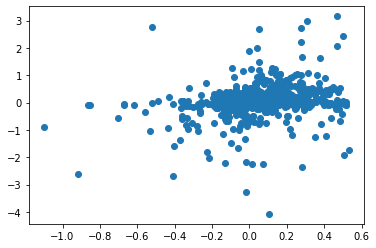

In [4]:
plt.scatter(df['x12014'], df['x32014'])

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
import skfuzzy as fuzz
import array as arr

In [6]:
data_fz = []
for var in df.columns[0:5]:
    data_fz.append(df[var].to_list())
data_fz = np.array(data_fz)
labels_crips = data_fz[-1]
data_fz = data_fz[0:2]
sets = 2
m = 2.0 # how abrupt is the change of a fuzzy set to another
error = 1e-9
max_iter = 200
centr, u, u0, d, jm, p, fcp = fuzz.cmeans(data_fz, sets, m, error, max_iter )
# This return centr ( centroids )
cluster_membership = np.argmax(u, axis=0)  # Return labels....

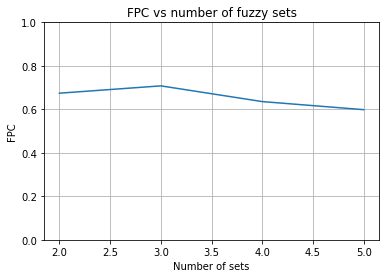

In [7]:
labels_crips
max_SETS=5
sets = np.arange(2,max_SETS+1)
FPl = []
for fset in sets:
    cntr, u , u0, d, jm , p, fcp = fuzz.cmeans(data_fz,fset, m, error, max_iter)
    FPl.append(fcp)
plt.title("FPC vs number of fuzzy sets")
plt.ylabel("FPC")
plt.xlabel("Number of sets")
plt.ylim([0,1])
plt.grid()
plt.plot(sets,FPl,'-')


Best solution is [ 0.16937469  0.28964099 -0.03241091  0.03294939]
Fitness of the best solution is 0.004385037642219361
Best solution found after 80 generations


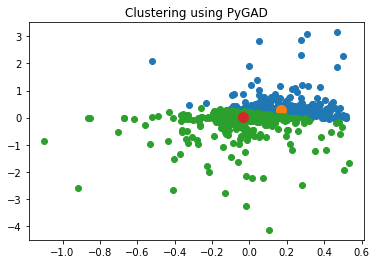

In [8]:
# Genetic implementation
import pygad
import numpy
def genetic_df(df,initial_column, end_column):
    data = []
    for index in df.index:
        data.append(list(df.iloc[index,initial_column:end_column]))
    return np.array(data)
df_gkm = genetic_df(df,0,2)
data = df_gkm.copy()
"""
"""
def euclidean_distance(X, Y):
    return numpy.sqrt(numpy.sum(numpy.power(X - Y, 2), axis=1))

def cluster_data(solution, solution_idx):
    global num_cluster, data
    feature_vector_length = data.shape[1]
    cluster_centers = []
    all_clusters_dists = []
    clusters = []
    clusters_sum_dist = []

    for clust_idx in range(num_clusters):
        cluster_centers.append(solution[feature_vector_length*clust_idx:feature_vector_length*(clust_idx+1)])
        cluster_center_dists = euclidean_distance(data, cluster_centers[clust_idx])
        all_clusters_dists.append(numpy.array(cluster_center_dists))

    cluster_centers = numpy.array(cluster_centers)
    all_clusters_dists = numpy.array(all_clusters_dists)

    cluster_indices = numpy.argmin(all_clusters_dists, axis=0)
    for clust_idx in range(num_clusters):
        clusters.append(numpy.where(cluster_indices == clust_idx)[0])
        if len(clusters[clust_idx]) == 0:
            clusters_sum_dist.append(0)
        else:
            clusters_sum_dist.append(numpy.sum(all_clusters_dists[clust_idx, clusters[clust_idx]]))

    clusters_sum_dist = numpy.array(clusters_sum_dist)

    return cluster_centers, all_clusters_dists, cluster_indices, clusters, clusters_sum_dist

def fitness_func(solution, solution_idx):
    _, _, _, _, clusters_sum_dist = cluster_data(solution, solution_idx)

    fitness = 1.0 / (numpy.sum(clusters_sum_dist) + 0.00000001)

    return fitness

num_clusters = 2
num_genes = num_clusters * data.shape[1]

ga_instance = pygad.GA(num_generations=100,
                       sol_per_pop=10,
                       num_parents_mating=5,
                       init_range_low=-6,
                       init_range_high=20,
                       keep_parents=2,
                       num_genes=num_genes,
                       fitness_func=fitness_func,
                       suppress_warnings=True)

ga_instance.run()
best_solution, best_solution_fitness, best_solution_idx = ga_instance.best_solution()
print("Best solution is {bs}".format(bs=best_solution))
print("Fitness of the best solution is {bsf}".format(bsf=best_solution_fitness))
print("Best solution found after {gen} generations".format(gen=ga_instance.best_solution_generation))
cluster_centers, all_clusters_dists, cluster_indices, clusters, clusters_sum_dist = cluster_data(best_solution, best_solution_idx)
for cluster_idx in range(num_clusters):
    cluster_x = data[clusters[cluster_idx], 0]
    cluster_y = data[clusters[cluster_idx], 1]
    plt.scatter(cluster_x, cluster_y)
    plt.scatter(cluster_centers[cluster_idx, 0], cluster_centers[cluster_idx, 1], linewidths=5)
plt.title("Clustering using PyGAD")
plt.show()

In [9]:
df['predic_genetic'] = cluster_indices
df['predic_genetic'] = df['predic_genetic'].astype("category")
df['predic_kmeans'] = y_km
df['predic_kmeans'] =  df['predic_kmeans'].astype("category")
df['predic_kmeans++'] = y_km_plus
df['predic_kmeans++']  = df['predic_kmeans++'].astype("category")
df['predic_cmeans'] = cluster_membership
df['predic_cmeans'] = df['predic_cmeans'].astype("category")

In [12]:
from tableone  import TableOne, load_dataset
from scipy import stats
categorial = []
nonormal = []
normal = []
for t in df.columns:
    print(df[t].dtypes, t)
    if df[t].dtypes=="object" or df[t].dtypes.name=='category':
        categorial.append(t)
    if df[t].dtypes=="int64" or df[t].dtypes=="float64":
            n,p = stats.shapiro(df[t])
            if p<0.05:
                nonormal.append(t)
            else: 
                normal.append(t)
                
print(len(df.columns)) 
print(len(normal) + len(nonormal) + len(categorial))
mytable_C = TableOne(df,categorical=categorial, nonnormal=nonormal,  groupby='Status', pval=True)
mytable_C.to_latex('table.tex')
mytable_C.to_excel('table.xlsx')

/usr/local/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


float64 x12014
float64 x22014
float64 x32014
float64 x42014
int64 Status
category predic_genetic
category predic_kmeans
category predic_kmeans++
category predic_cmeans
9
9
